  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

C:\Users\Hp\AppData\Local\Temp\ipykernel_5348\3007352625.py:29: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  print(df.interpolate())


       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan 2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan 2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan 2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan 2020-01-07          NaN        0.0   
...         ...       ...          ...        ...          ...        ...   
350103      ZWE    Africa     Zimbabwe 2023-10-14     265808.0        0.0   
350104      ZWE    Africa     Zimbabwe 2023-10-15     265808.0        0.0   
350105      ZWE    Africa     Zimbabwe 2023-10-16     265808.0        0.0   
350106      ZWE    Africa     Zimbabwe 2023-10-17     265808.0        0.0   
350107      ZWE    Africa     Zimbabwe 2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

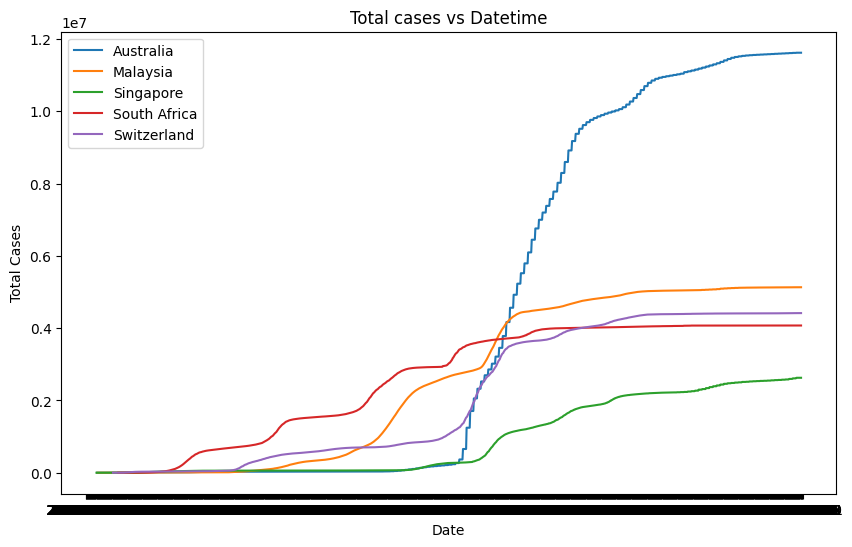

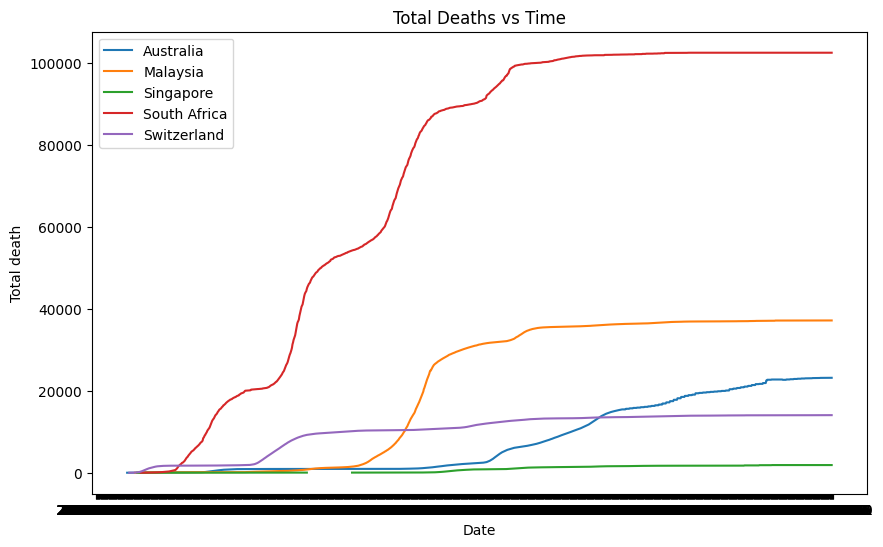

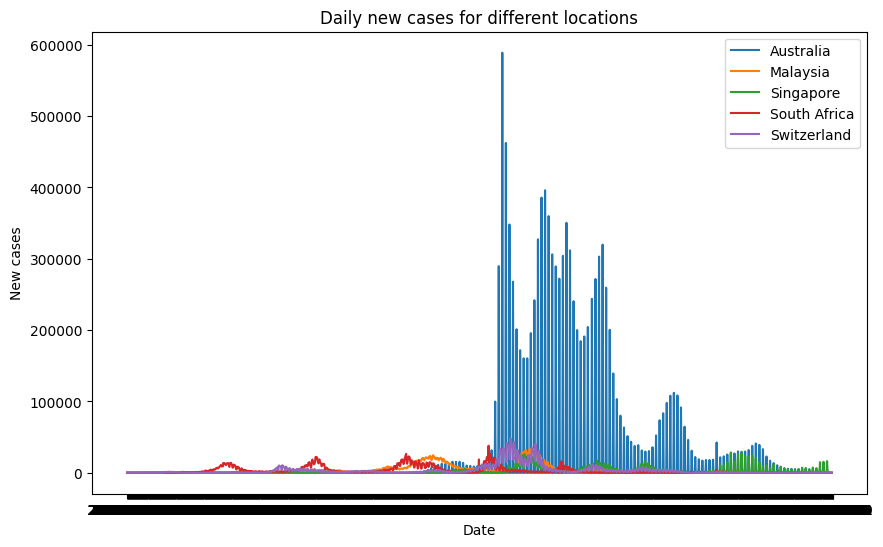

18024          NaN
18025          NaN
18026          NaN
18027          NaN
18028          NaN
            ...   
303218    0.318524
303219    0.318524
303220    0.318524
303221    0.318524
303222    0.318524
Name: death_rate, Length: 6929, dtype: float64
           location iso_code        date  total_vaccinations  \
10577     Australia      AUS  2021-02-21                20.0   
10578     Australia      AUS  2021-02-22              2789.0   
10579     Australia      AUS  2021-02-23              6914.0   
10580     Australia      AUS  2021-02-24             16629.0   
10581     Australia      AUS  2021-02-25             23510.0   
...             ...      ...         ...                 ...   
158168  Switzerland      CHE  2023-06-29          16940691.0   
158169  Switzerland      CHE  2023-06-30          16940706.0   
158170  Switzerland      CHE  2023-07-01          16940711.0   
158171  Switzerland      CHE  2023-07-02                 NaN   
158172  Switzerland      CHE  2023-07-03

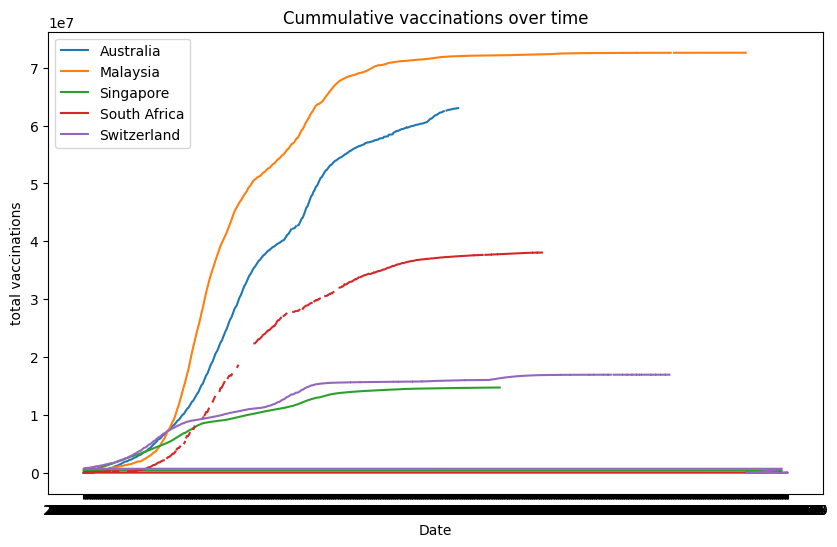

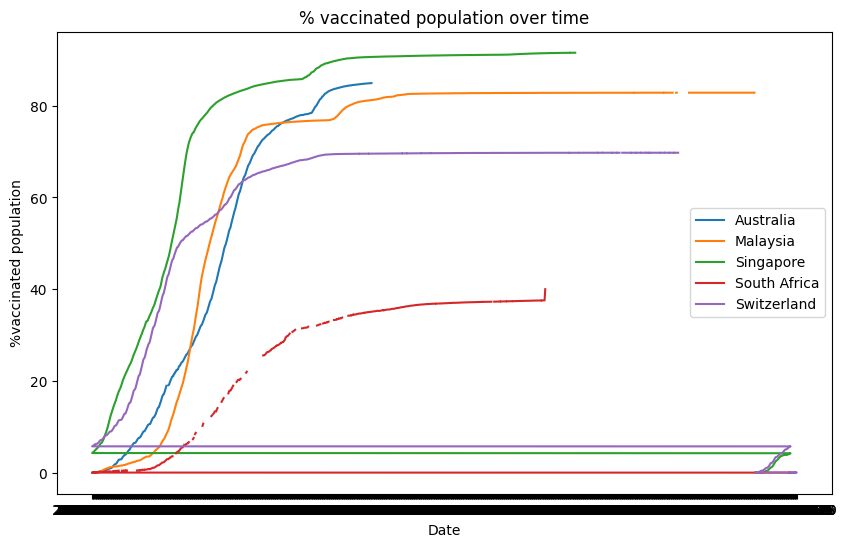

In [ ]:
#Import Files#
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

#2.1 Load and explore Dataset
df = pd.read_csv('owid-covid-data.csv')
print(df.head())
#print(df.columns())

#Missing Values
df.isnull()

#3.1 Data Cleaning
#Filtering data to  show only South Africa as the location 
filtered_df = df[df['location'].isin(['South Africa','Singapore','Switzerland','Malaysia','Australia'])]
print(filtered_df)

#Dropping rows with incomplete data
df_dropped = df.dropna(how='all', axis = 1 )
print(df_dropped)

#Changing column name from date to datetime
df['date'] = pd.to_datetime(df['date'])

#Interpolation of missing data
df = df.infer_objects(copy=False)
print(df.interpolate())

#4 Basic Data Analysis
print(df.describe())

#Exploratory Data Analysis

#Line Plot for total cases over time for South Africa, Singapore, Switzerland, Malaysia and Australia

locations = filtered_df['location'].unique()

plt.figure(figsize=(10, 6))

for location in locations:
    location_data = filtered_df[filtered_df['location'] == location]
    plt.plot(location_data['date'], location_data['total_cases'], label=location)

plt.title('Total cases vs Datetime')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

#Line plot for Total deaths over time for South Africa,Singapore, Switzerland, Malaysia and Australia
locations = filtered_df['location'].unique()

plt.figure(figsize=(10, 6))

for location in locations:
    location_data = filtered_df[filtered_df['location'] == location]
    plt.plot(location_data['date'], location_data['total_deaths'], label=location)

plt.title('Total Deaths vs Time')
plt.xlabel('Date')
plt.ylabel('Total death')
plt.legend()
plt.show()

#Comparing daily new cases over time for South Africa, Singapore, Switzerland, Malaysia and Australia
locations = filtered_df['location'].unique()

plt.figure(figsize=(10, 6))

for location in locations:
    location_data = filtered_df[filtered_df['location'] == location]
    plt.plot(location_data['date'], location_data['new_cases'], label=location)

plt.title('Daily new cases for different locations')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.legend()
plt.show()

#Calculate the death rate : total_deaths/ total_cases

filtered_df['total_deaths'] = pd.to_numeric(filtered_df['total_deaths'], errors='coerce')
filtered_df['total_cases'] = pd.to_numeric(filtered_df['total_cases'], errors='coerce')
death_rate = (filtered_df['total_deaths' ]/ filtered_df['total_cases'].replace(0, float('nan'))) * 100
filtered_df['death_rate'] = death_rate
print(filtered_df['death_rate'])

#Section 5 Visualizing Vaccination Progress
#Plot cumulative vaccinations over time for selected countries.

vaccine_df =pd.read_csv('vaccinations.csv')
vaccinations_df = vaccine_df[vaccine_df['location'].isin(['South Africa','Singapore','Switzerland','Malaysia','Australia'])]
print(vaccinations_df)

locations = vaccinations_df['location'].unique()

plt.figure(figsize=(10, 6))

for location in locations:
    location_data = vaccinations_df[vaccinations_df['location'] == location]
    plt.plot(location_data['date'], location_data['total_vaccinations'], label=location)

plt.title('Cummulative vaccinations over time')
plt.xlabel('Date')
plt.ylabel('total vaccinations')
plt.legend()
plt.show()

#Compare % vaccinated population.

locations = vaccinations_df['location'].unique()

plt.figure(figsize=(10, 6))

for location in locations:
    location_data = vaccinations_df[vaccinations_df['location'] == location]
    plt.plot(location_data['date'], location_data['people_vaccinated_per_hundred'], label=location)

plt.title('% vaccinated population over time')
plt.xlabel('Date')
plt.ylabel('%vaccinated population')
plt.legend()
plt.show()


#Section 7 Inisghts and reporting
#Insights 

#Australia had the highest number of cases and the sharpest rise of cases but didn't succumb to a high death rate. Unlike Australia, South Africa had a high death rate, almost 3 times more than Malysia who had a similar number of total cases over time. This is indicative of a weaker healthcare system and a very ineffective reaction to the covid-19 outbreak.
#

Insights 

Australia had the highest number of cases and the sharpest rise of cases but didn't succumb to a high death rate. Unlike Australia, South Africa had a high death rate, almost 3 times more than Malysia who had a similar number of total cases over time. This is indicative of a weaker healthcare system and a very ineffective reaction to the covid-19 outbreak.A reason for this phenomenon is the difference in vaccine rollout between Malaysia and South Africa. Malysia had the highest vaccinations across all 5 countries whilst South Africa ranked third of the five. This is one explanation for the high death rate. Additionally South Africa had the lowest % vaccinated population across time, which is an another factor leading to the high death rate.